In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data

def read_data():
    train_data = pd.read_csv("dataset\\train.csv")
    print("Train data imported successfully")
    test_data = pd.read_csv("dataset\\test.csv")
    print("Test data imported successfully")
    
    return train_data, test_data


train_data, test_data = read_data()

combine = [train_data, test_data]

Train data imported successfully
Test data imported successfully


## Discovering the data

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Discovering features

print("Train data features are : \n")
print(train_data.columns.values)
print("\n","="*80, "\n")
print("Test data features are : \n")
print(test_data.columns.values)

Train data features are : 

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Test data features are : 

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [6]:
# Discovering the features types

train_data.info()
print('\n', '_'*40, '\n')

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 ________________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

In [7]:
# Discovering the missing values

print(train_data.isnull().sum())

print("\n", '_'*40, '\n')

print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 ________________________________________ 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
# Discovering the percentage(%) of missing values

print(train_data.isna().sum()/train_data.PassengerId.count()*100)

print("\n", '_'*40, '\n')

print(test_data.isna().sum()/test_data.PassengerId.count()*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

 ________________________________________ 

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


In [9]:
# discovering the numerical data distribution

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical data distribution discovering results: **

  *  The survival rate for this data is 38.3%.
   *  More than 75% of the passengers are below 38 years old.
   *   There are too few old passengers.
   *   Most passengers travel alone.
   *   There are a few outliers in the Fare feature.

 *  insights:

  *  Age feature has right skewness, So if we are going to fill missing values we will not use the average.
   *   There are outliers in Fare, Age, SibSp and Parch features. This inspire us for EDA Step.

In [10]:
## Discovering the categorical distribution

train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gale, Mr. Shadrach",male,1601,G6,S
freq,1,577,7,4,644


 *   Categorical data distribution discovering results:
      *   There are no duplicated names.
       *    64.7% of the passengers are males
        *    There are duplicated values in the Ticket feature (23.5% are duplicated).
         *    There are duplicated values in the Cabin feature (27.9% are duplicated).
          *    72.4% of the passengers used "S" Embarked.

    *       insights:

      *      Names uniqueness gives us unsight for Data Engineering Step.
       *     Duplicate values in Ticket and Cabin features give us insights to make the right decision when filling missed values.
       *      we will fill missed Embarked values with 'S' type.

## Exploratory Data Analysis

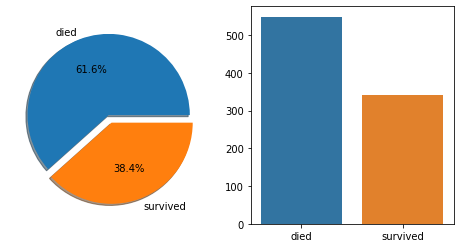

In [26]:
# count of survived

fig,ax=plt.subplots(1,2,figsize=(8,4))
train_data['Survived'].replace({0:"died",1:"survived"}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x = train_data["Survived"].replace({0:"died",1:"survived"}) , ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

We saw before that only 338 (38%) of the passengers survived,

We need to dig down more to get better insights from the data 

and see which categories of the passengers did survive and who didn't.

In [27]:
# Discovering The feature correlation with survived

# Helper functions:
def survived_bar_plot(feature):
    plt.figure(figsize = (6,4))
    sns.barplot(data = train_data , x = feature , y = "Survived").set_title(f"{feature} Vs Survived")
    plt.show()
def survived_table(feature):
    return train_data[[feature, "Survived"]].groupby([feature], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)
def survived_hist_plot(feature):
    plt.figure(figsize = (6,4))
    sns.histplot(data = train_data , x = feature , hue = "Survived",binwidth=5,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title(f"{feature} Vs Survived")
    plt.show()

## Sex Vs Survived

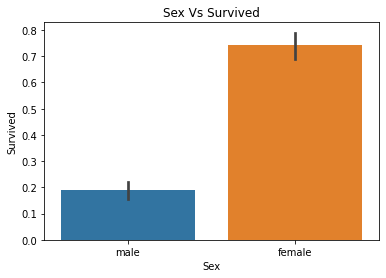

In [29]:


survived_bar_plot('Sex')

In [30]:
survived_table('Sex')

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Pclass vs Survived

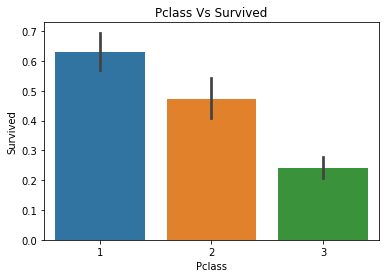

In [32]:
survived_bar_plot('Pclass')

In [33]:
survived_table('Pclass')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Embarked vs Survived

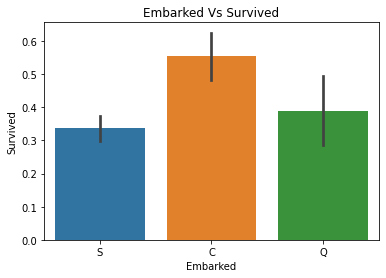

In [35]:
survived_bar_plot('Embarked')

In [36]:
survived_table('Embarked')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


## Parch vs Survived

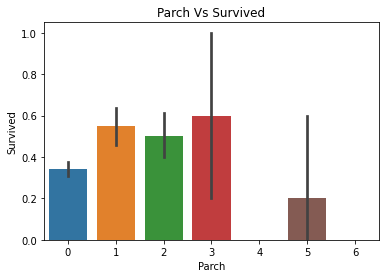

In [37]:
survived_bar_plot('Parch')

In [38]:
survived_table('Parch')

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## SibSp vs Survived

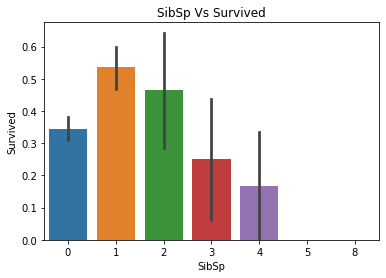

In [39]:
survived_bar_plot('SibSp')

In [40]:
survived_table('SibSp')

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## Age vs Survied

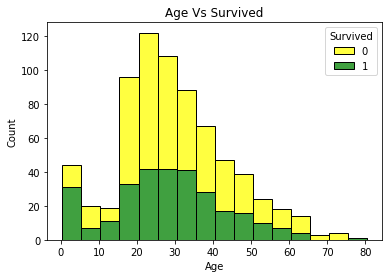

In [42]:
survived_hist_plot('Age')

Infants (age<=5) and childrens (between 10 and 15 years old) are most likely to survive.

elder passengers (>75) survived.

most passengers are between 15 and 40 years old.

## Discovering the correlations between the features

<AxesSubplot:>

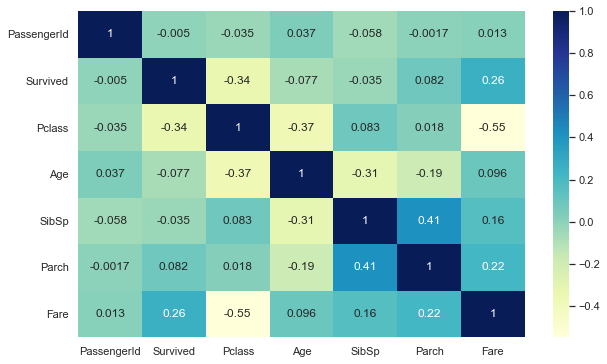

In [43]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(train_data.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

Passenger Id has no correlation with any feature.

PClass has strong negative correlation with age and Fare.

Age has negative correlation with parch and sibsp.

https://www.kaggle.com/code/odaymourad/detailed-and-typical-solution-ensemble-modeling/notebook

In [ ]:
https://www.kaggle.com/code/odaymourad/random-forest-model-clearly-explained